In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lightgbm

OSError: dlopen(/Users/we56sc/Developer/miniconda3/envs/py36/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/we56sc/Developer/miniconda3/envs/py36/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [12]:
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


In [5]:
data_taiwan = pd.read_csv(
    "/Users/we56sc/Analytics/DataSets/Default_Of_Credit_Card_Clients/UCI_Credit_Card.csv"
)

In [ ]:
data_taiwan

In [6]:
data_taiwan.drop('ID',inplace=True, axis=1)
data_taiwan.drop(['SEX', 'EDUCATION', 'MARRIAGE'],inplace=True, axis=1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(
     data_taiwan.drop('default.payment.next.month', axis=1), 
     data_taiwan['default.payment.next.month'], 
     test_size=0.33, random_state=42)


In [105]:
model_1 = XGBClassifier(n_estimators=500, max_depth=2, reg_lambda =1000).fit(X_train,y_train)


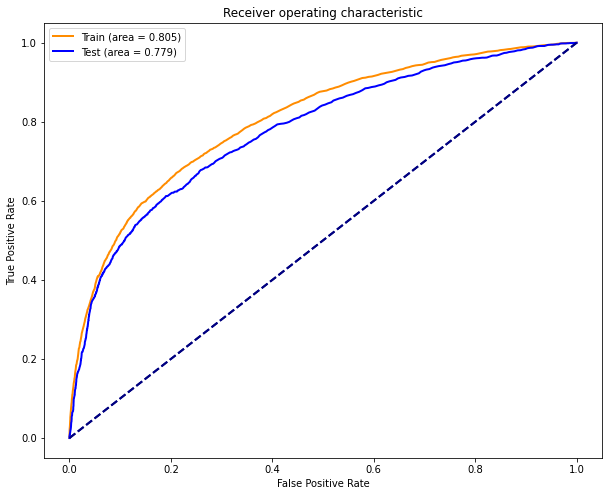

In [106]:
fig, ax = plt.subplots(figsize=(10,8))
plot_roc_curve(model_1,X_train,y_train, ax=ax,  label ='Train')
plot_roc_curve(model_1,X_test,y_test, ax=ax, color='blue', label ='Test')

In [84]:
params = model_1.get_params()
params.pop('objective')

'binary:logistic'

In [85]:
from helper import ExtendedXGboost, plot_roc_curve,plot_precision_recall_curve

In [86]:
ext_model_1 = (
    ExtendedXGboost(objective='user:weight', imbalance_alpha=1, **params)
    .fit(X_train,y_train)
)

ext_model_2 = (
    ExtendedXGboost(objective='user:weight', imbalance_alpha=10, **params)
    .fit(X_train,y_train)
)

ext_model_3 = (
    ExtendedXGboost(objective='user:weight', imbalance_alpha=5000, **params)
    .fit(X_train,y_train)
)

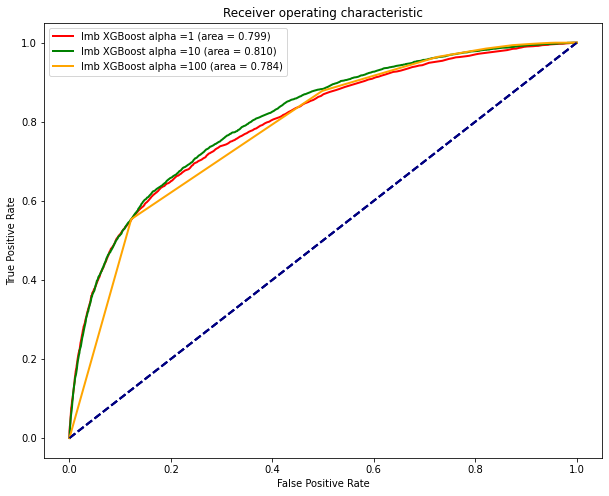

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
# plot_roc_curve(model_1,X_train,y_train, ax=ax, color='blue', label ='Regular XGBoost')
plot_roc_curve(ext_model_1,X_train,y_train, ax=ax, color='red', label ='Imb XGBoost alpha =1')
plot_roc_curve(ext_model_2,X_train,y_train, ax=ax, color='green', label ='Imb XGBoost alpha =10')
plot_roc_curve(ext_model_3,X_train,y_train, ax=ax, color='orange', label ='Imb XGBoost alpha =100')

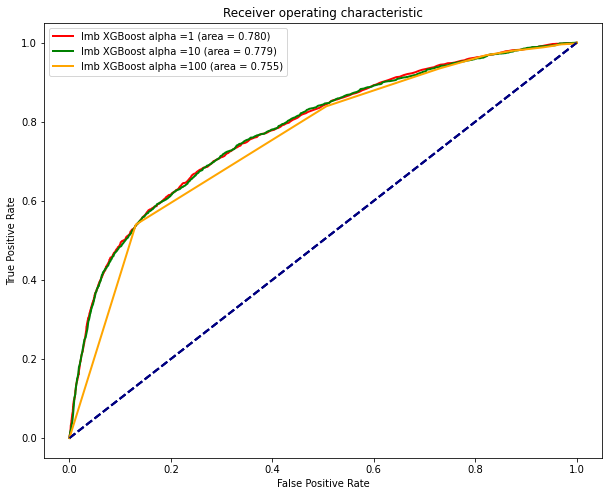

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
plot_roc_curve(ext_model_1,X_test,y_test, ax=ax, color='red', label ='Imb XGBoost alpha =1')
plot_roc_curve(ext_model_2,X_test,y_test, ax=ax, color='green', label ='Imb XGBoost alpha =10')
plot_roc_curve(ext_model_3,X_test,y_test, ax=ax, color='orange', label ='Imb XGBoost alpha =100')

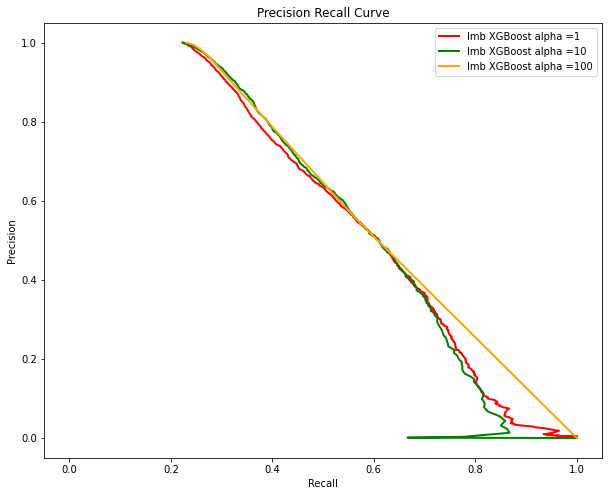

In [89]:
fig, ax = plt.subplots(figsize=(10,8))
# plot_roc_curve(model_1,X_train,y_train, ax=ax, color='blue', label ='Regular XGBoost')
plot_precision_recall_curve(ext_model_1,X_train,y_train,pos_label=1,  ax=ax, color='red', label ='Imb XGBoost alpha =1')
plot_precision_recall_curve(ext_model_2,X_train,y_train,pos_label=1, ax=ax, color='green', label ='Imb XGBoost alpha =10')
plot_precision_recall_curve(ext_model_3,X_train,y_train,pos_label=1, ax=ax, color='orange', label ='Imb XGBoost alpha =100')